# Assignment 2 

## PART A : Prerequisite for kNN implementation

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
v1 = np.array([1, 6, 7, 9])
v2 = np.array([1, 0, 6, 9])
result = np.sum(v1 == v2)
print(result)

2


In [10]:
matrix = np.random.randint(0, 100, (10, 3))
print(f'The shape of the matrix is {matrix.shape}')
print(f'The number of rows of the matrix is {matrix.shape[0]}')
print(f'The number of columns of the matrix us {matrix.shape[1]}')

print(f'\nThe matrix before modification\n {matrix}')

j = 0
for i in range(0, matrix.shape[0]):
    result = matrix[i][j] + matrix[i][j+1]
    if(result % 4 == 0):
        matrix[i][j+2] = 1
    else: 
        matrix[i][j+2] = 0
print(f'\nMatrix after evaluation\n {matrix}')

The shape of the matrix is (10, 3)
The number of rows of the matrix is 10
The number of columns of the matrix us 3

The matrix before modification
 [[83 67 17]
 [ 9 23 81]
 [57 38 61]
 [99 98 53]
 [37 19 55]
 [60 40 18]
 [94 81 53]
 [25 34 53]
 [26  3 93]
 [53 71 66]]

Matrix after evaluation
 [[83 67  0]
 [ 9 23  1]
 [57 38  0]
 [99 98  0]
 [37 19  1]
 [60 40  1]
 [94 81  0]
 [25 34  0]
 [26  3  0]
 [53 71  1]]


In [11]:
colunmns = []
df = pd.DataFrame({'X1' : matrix[:, 0], 'X2' : matrix[:, 1], 'Y' : matrix[:, 2]})
df

,X1,X2,Y
0,83,67,0
1,9,23,1
2,57,38,0
3,99,98,0
4,37,19,1
5,60,40,1
6,94,81,0
7,25,34,0
8,26,3,0
9,53,71,1


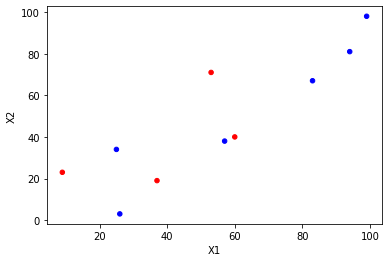

In [12]:
col = df.Y.map({0:'b', 1:'r'})

df.plot.scatter(x='X1', y='X2', c=col)
plt.show()

In [14]:
squared_error = np.square(df['X1'] - df['X2'])
squared_error.shape
print(squared_error)

0    256
1    196
2    361
3      1
4    324
5    400
6    169
7     81
8    529
9    324
dtype: int32


In [15]:
matrix_sum = np.sum(squared_error)
print(matrix_sum)

2641


In [16]:
import math
result = math.sqrt(pow(df.iat[0, 0] - df.iat[1, 0], 2) + pow(df.iat[0, 1] - df.iat[1, 1], 2))
result

86.09297300012354

In [33]:
a = df.iloc[0, :]
b = df.iloc[1, :]

print(a, b)

np.linalg.norm(a-b)

X1    83
X2    67
Y      0
Name: 0, dtype: int32 X1     9
X2    23
Y      1
Name: 1, dtype: int32


86.09878047916823

In [104]:
import random
V = np.random.randint(1, 100, size=2)

def getEuclideanDistance(a, b):
    return math.sqrt(pow((a[0]-b[0]), 2) + pow((a[1]-b[1]), 2))

The Euclidean Distances are -
[42.7551166528639, 61.05735008989499, 40.311288741492746, 62.39390995922599, 56.142675390472796, 39.824615503479755, 53.33854141237835, 44.01136216933077, 73.54590403278758, 12.649110640673518]


In [105]:
result = []

for index, row in df.iterrows():
    result.append(getEuclideanDistance(row[0:2], V))

print(f'The Euclidean Distances are -\n{result}')

The Euclidean Distances are -
[42.7551166528639, 61.05735008989499, 40.311288741492746, 62.39390995922599, 56.142675390472796, 39.824615503479755, 53.33854141237835, 44.01136216933077, 73.54590403278758, 12.649110640673518]


In [78]:
A = np.zeros((10, 2), dtype=np.int8)

B = np.random.randint(1, 100, size=(10, 1))

A = np.column_stack((A, B))
print(f'Stacking Columns\n{A}, {A.shape}\n\n')

C = np.array([1, 2, 3])
A = np.vstack((A, C))
print(f'Stacking Rows\n{A}, {A.shape}\n\n')

Stacking Columns
[[ 0  0 81]
 [ 0  0 36]
 [ 0  0 23]
 [ 0  0 35]
 [ 0  0 64]
 [ 0  0 61]
 [ 0  0 50]
 [ 0  0 60]
 [ 0  0 68]
 [ 0  0 34]], (10, 3)


Stacking Rows
[[ 0  0 81]
 [ 0  0 36]
 [ 0  0 23]
 [ 0  0 35]
 [ 0  0 64]
 [ 0  0 61]
 [ 0  0 50]
 [ 0  0 60]
 [ 0  0 68]
 [ 0  0 34]
 [ 1  2  3]], (11, 3)




In [116]:
M = df.values[:, 0:2]
m = pd.DataFrame({'X1' : np.random.randint(1, 100, size=10), 'X2' : np.random.randint(1, 100, size=10)})

Dist = np.zeros((10, 3), dtype=np.int8)
Dist

row_counter = 0
for index, rows in m.iterrows():
    Dist[row_counter, 2] = getEuclideanDistance(M[row_counter, :], rows)
    Dist[row_counter, 0] = row_counter
    Dist[row_counter, 1] = row_counter
    row_counter += 1;

Dist

array([[ 0,  0, 78],
       [ 1,  1, 85],
       [ 2,  2, 26],
       [ 3,  3, 46],
       [ 4,  4, 62],
       [ 5,  5, 39],
       [ 6,  6, 49],
       [ 7,  7, 33],
       [ 8,  8, 70],
       [ 9,  9, 66]], dtype=int8)

In [121]:
from sklearn.metrics.pairwise import euclidean_distances

result = euclidean_distances(m.values, M)
print(f'The result is\n {result}')

The result is
 [[ 78.64477096  60.07495318  68.01470429  94.20191081  71.11258679
   69.02897942  88.02272434  52.55473337  82.46211251  48.50773134]
 [ 24.69817807  85.61541917  35.51056181  54.45181356  60.41522987
   32.24903099  37.05401463  67.74215822  77.69813383  47.4341649 ]
 [ 47.5394573   42.52058325  26.2488095   75.45197148  36.
   27.45906044  62.64982043  24.18677324  53.15072906  22.627417  ]
 [ 12.04159458  74.70609078  26.90724809  46.64761516  54.45181356
   23.43074903  29.83286778  55.4616985   73.66138744  25.55386468]
 [ 59.43904441  59.20304046  52.80151513  76.15773106  62.16912417
   53.15072906  69.007246    46.          77.00649323  29.41088234]
 [ 67.62396025  20.80865205  36.05551275  97.20082304  26.40075756
   39.          83.72574276   7.21110255  37.33630941  44.55333882]
 [ 31.90611227  59.48108943   9.21954446  66.73080248  35.80502758
    6.          49.64876635  41.43669871  54.4885309   33.61547263]
 [ 52.          49.1934955   38.94868419  74.732

In [127]:
print(f'Dist before sorting\n{Dist}\n')

print(f'Dist after sorting\n{Dist[Dist[:, 2].argsort()]}')

Dist before sorting
[[ 0  0 78]
 [ 1  1 85]
 [ 2  2 26]
 [ 3  3 46]
 [ 4  4 62]
 [ 5  5 39]
 [ 6  6 49]
 [ 7  7 33]
 [ 8  8 70]
 [ 9  9 66]]

Dist after sorting
[[ 2  2 26]
 [ 7  7 33]
 [ 5  5 39]
 [ 3  3 46]
 [ 6  6 49]
 [ 4  4 62]
 [ 9  9 66]
 [ 8  8 70]
 [ 0  0 78]
 [ 1  1 85]]


In [142]:
sorted_matrix = Dist[Dist[:, 2].argsort()]

def get_k_rows(matrix, k):
    return matrix[:k, :]

In [146]:
def get_ones_and_zeros(matrix):
    
    result = [0, 0]
    
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if (matrix[i][j] == 1):
                result[0] += 1
            elif (matrix[i][j] == 0):
                result[1] += 1
    
    return result

In [147]:
def print_result(matrix):
    
    ones = 0
    zeros = 0
    
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if (matrix[i][j] == 1):
                ones += 1
            else:
                zeros += 1
    if (ones > zeros):
        print(1)
    else:
        print(0)

In [158]:
k_rows = get_k_rows(Dist, 5)

zeros_and_ones = get_ones_and_zeros(k_rows)

print(f'The number of ones are {zeros_and_ones[0]} and the number of zeros are {zeros_and_ones[1]}')

print_result(k_rows)

The number of ones are 2 and the number of zeros are 2
0


## kNN Implementation


In [160]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
from sklearn.model_selection import train_test_split

data_values = data.values

X = data_values[:, 0:8]
Y = data_values[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)